## Setup

In [ ]:
# Run this if you don't have openai installed already
!pip install openai

In [2]:
import os
import urllib
import openai
from openai import OpenAI
from IPython.display import Image
from IPython.core.display import HTML 

In [4]:
# Load your API key from an environment variable or secret management service
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

# DALL-E 3

Generating an image is just a single function call. We set the model (DALL-E 3 in this case), a prompt and add in some additional parameters such as the output image size, quality (standard or hd), n (the number of images to generate) and the style. The style can be "vivid" which causes the model to lean towards generating hyper-real and dramatic images while setting it to "natural" causes the model to produce more natural, less hyper-real images.

Some quick notes though (As of Nov 15 2023):
* Your prompt is not sent to the model as-is. Instead, the prompt is sent to GPT which revises the prompt to add more detail. We can see this revised prompt in the model's response as shown below.
* DALL-E 3 is restricted to `n=1`
* You can learn more about the models in this notebook from the [OpenAI documentation](https://platform.openai.com/docs/guides/images).

In [17]:
response = client.images.generate(
  model="dall-e-3",
  prompt="a margherita pizza in a cafe overlooking the sea in Italy.",
  size="1024x1024",
  quality="hd",
  style='vivid',
  n=1,
)

In [20]:
image_url = response.data[0].url
Image(url=image_url)

Pretty good! As mentioned above DALL-E 3 doesn't use our prompts as-is. We can take a look at the revised prompt like so.

In [19]:
response.data[0].revised_prompt

"Imagine a picturesque view from an Italian cafe. From this vantage point, the azure sea sparkles under the warm sunlight, dotted with small sail boats gently sailing across. At the forefront, on a table next to the cafe's sea-facing window, rests a tantalizing Margherita pizza. Its thin, golden crust is garnished with fresh, vibrant basil leaves, molten mozzarella cheese, and juicy, ripe tomatoes. The scent of the pizza mingles with the salty sea air, creating a delightful ambiance that encapsulates a quintessential Italian seaside experience."

That's definitely a very different prompt than the one we made, but the result looks great! Now let's do the same thing with a natural style image instead.

In [10]:
response = client.images.generate(
  model="dall-e-3",
  prompt="a margherita pizza in a cafe overlooking the sea in Italy.",
  size="1024x1024",
  quality="hd",
  style='natural',
  n=1,
)

In [11]:
image_url = response.data[0].url
Image(url=image_url)

In [16]:
response.data[0].revised_prompt

'Imagine a tradition Italian cafe scene. The focus is a mouthwatering Margherita pizza - its garnishing of vibrant red tomatoes, and handfuls of white mozzarella cheese are in sharp contrast with the lush green of the basil leaves on top. The pizza is delicately laid in the center of a rustic wooden table that features a checkered cloth and a pair of salt and pepper shakers. The cafe is painted in earthy tones and vines dance over the walls. Through the open window, the emerald-blue Mediterranean sea can be seen gently crashing into the cliffs under the warm, golden sun of Italy.'

# DALL-E 2

DALL-E 2 follows much of the same code as above but lacks some of the new features from DALL-E 3 such as the `quality` and `style` parameters, as well as the prompt rewriting technique.

## Generating Images

In [21]:
response = client.images.generate(
  model="dall-e-2",
  prompt="a margherita pizza in a cafe overlooking the sea in Italy.",
  size="1024x1024",
)

In [22]:
image_url = response.data[0].url
Image(url=image_url)

## Creating Variations

DALL-E 2 does have some extra features that have not been added to DALL-E 3 (as of the time of this writing). One feature is the ability to generate variations of existing images.

In [24]:
# Download and save the image locally
# You can skip this step if you want to use your own image
urllib.request.urlretrieve(image_url, "./test.png")

('./test.png', <http.client.HTTPMessage at 0x7ff1d7768f70>)

In [25]:
response = client.images.create_variation(
  image=open("./test.png", "rb"),
  n=1,
  size="1024x1024"
)

In [26]:
image_url = response.data[0].url
Image(url=image_url)

## Editing

We can also edit existing images by creating a mask over the parts of the image we want to modify. 

In [28]:
response = client.images.edit(
  model="dall-e-2",
  image=open("./test.png", "rb"),
  mask=open("./test_mask.png", "rb"),
  prompt="a margherita pizza in a cafe overlooking the sea in Italy.",
  n=1,
  size="1024x1024"
)

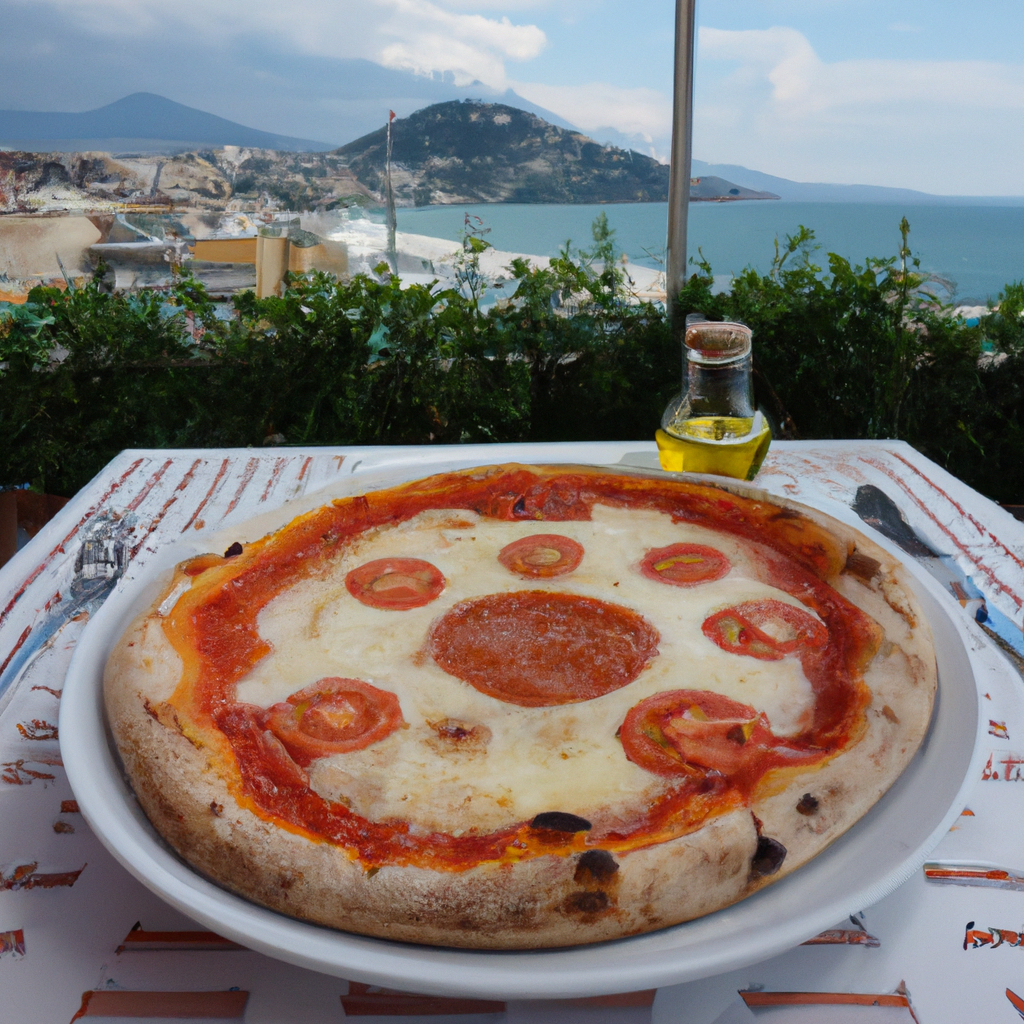

In [30]:
# Let's look at our original image
Image("./test.png")

In [29]:
image_url = response.data[0].url
Image(url=image_url)

And we're done!